<a href="https://colab.research.google.com/github/rsadaphule/caies/blob/master/Assignment5/Sadaphule_Assign5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Assignment 5:**
This exercises use the google ColaboratoryLinks to an external site.  rather than you local docker image.  Using the Kaggle used car datasetLinks to an external site., transform the categorical data columns with Python script so that the data can be processed by a deep neural network.  Create a jupyter notebook - there is no need to create python and that part will not be graded in the rubric
.   Publish notebook to your github repository.  Submit the links to your github code repository and colab notebook.
Data ingest starts the machine learning process.  This ingest assumes "good" data.  Good data requires two key steps: handling data failures and formatting the data for machine learning model requirements.  The former, data failures, is discussed in the machine learning introduction video for this week.  Submit the DataFailureTemplate.xlsx Download DataFailureTemplate.xlsxspreadsheet with at least two types of data failures, the remedial solutions, and any disadvantages/considerations to the solutions.  

In [ ]:
#data files cars,csv is located on my google drive. We need to mount google druve first
from google.colab import drive
drive.mount('/content/drive/') 

In [12]:
CARS_FILE_PATH = "/content/drive/MyDrive/Colab Notebooks/data/cars.csv"

In [18]:
!ls "/content/drive/MyDrive/Colab Notebooks/data/"

cars.csv


In [14]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [47]:
df=pd.read_csv(CARS_FILE_PATH)
df.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7


In [48]:
#Check for null values 
df.isnull().sum()

manufacturer_name     0
model_name            0
transmission          0
color                 0
odometer_value        0
year_produced         0
engine_fuel           0
engine_has_gas        0
engine_type           0
engine_capacity      10
body_type             0
has_warranty          0
state                 0
drivetrain            0
price_usd             0
is_exchangeable       0
location_region       0
number_of_photos      0
up_counter            0
feature_0             0
feature_1             0
feature_2             0
feature_3             0
feature_4             0
feature_5             0
feature_6             0
feature_7             0
feature_8             0
feature_9             0
duration_listed       0
dtype: int64

In [49]:
df.dtypes

manufacturer_name     object
model_name            object
transmission          object
color                 object
odometer_value         int64
year_produced          int64
engine_fuel           object
engine_has_gas          bool
engine_type           object
engine_capacity      float64
body_type             object
has_warranty            bool
state                 object
drivetrain            object
price_usd            float64
is_exchangeable         bool
location_region       object
number_of_photos       int64
up_counter             int64
feature_0               bool
feature_1               bool
feature_2               bool
feature_3               bool
feature_4               bool
feature_5               bool
feature_6               bool
feature_7               bool
feature_8               bool
feature_9               bool
duration_listed        int64
dtype: object

In [50]:
#As you can see there are 10 values in 'engine' capacity columns that are null. The data type is numeric
#Lets replace null values with mean
mean_value=df['engine_capacity'].mean()
mean_value


2.055161106928688

In [51]:
df['engine_capacity'].fillna(value=mean_value, inplace=True)
df.isnull().sum()

manufacturer_name    0
model_name           0
transmission         0
color                0
odometer_value       0
year_produced        0
engine_fuel          0
engine_has_gas       0
engine_type          0
engine_capacity      0
body_type            0
has_warranty         0
state                0
drivetrain           0
price_usd            0
is_exchangeable      0
location_region      0
number_of_photos     0
up_counter           0
feature_0            0
feature_1            0
feature_2            0
feature_3            0
feature_4            0
feature_5            0
feature_6            0
feature_7            0
feature_8            0
feature_9            0
duration_listed      0
dtype: int64

In [52]:
#Lets replace bool data type values with int
for column in df.columns:
    if df.dtypes[column] == 'bool':
        df[column] = df[column].astype(np.int64)

In [53]:
df.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,0,gasoline,2.5,...,1,1,1,0,1,0,1,1,1,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,0,gasoline,3.0,...,1,0,0,1,1,0,0,0,1,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,0,gasoline,2.5,...,1,0,0,0,0,0,0,1,1,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,0,gasoline,3.0,...,0,0,0,0,0,0,0,0,0,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,0,gasoline,2.5,...,1,0,1,1,0,0,0,0,1,7


In [54]:
df.dtypes

manufacturer_name     object
model_name            object
transmission          object
color                 object
odometer_value         int64
year_produced          int64
engine_fuel           object
engine_has_gas         int64
engine_type           object
engine_capacity      float64
body_type             object
has_warranty           int64
state                 object
drivetrain            object
price_usd            float64
is_exchangeable        int64
location_region       object
number_of_photos       int64
up_counter             int64
feature_0              int64
feature_1              int64
feature_2              int64
feature_3              int64
feature_4              int64
feature_5              int64
feature_6              int64
feature_7              int64
feature_8              int64
feature_9              int64
duration_listed        int64
dtype: object

In [55]:
#Lets look at object type columns and unique count for each
{column: len(df[column].unique()) for column in df.columns if df.dtypes[column] == 'object' }

{'manufacturer_name': 55,
 'model_name': 1118,
 'transmission': 2,
 'color': 12,
 'engine_fuel': 6,
 'engine_type': 3,
 'body_type': 12,
 'state': 3,
 'drivetrain': 3,
 'location_region': 6}

In [56]:
df.describe()

,odometer_value,year_produced,engine_has_gas,engine_capacity,has_warranty,price_usd,is_exchangeable,number_of_photos,up_counter,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
count,38531.000000,38531.000000,38531.000000,38531.000000,38531.000000,38531.000000,38531.000000,38531.000000,38531.000000,38531.000000,38531.000000,38531.000000,38531.000000,38531.000000,38531.000000,38531.000000,38531.000000,38531.000000,38531.000000,38531.000000
mean,248864.638447,2002.943734,0.034959,2.055161,0.011653,6639.971021,0.352599,9.649062,16.306091,0.228543,0.607199,0.223820,0.275804,0.241468,0.356077,0.170979,0.263736,0.415328,0.579404,80.577249
std,136072.376530,8.065731,0.183678,0.671091,0.107319,6428.152018,0.477785,6.093217,43.286933,0.419900,0.488379,0.416808,0.446924,0.427979,0.478845,0.376496,0.440663,0.492785,0.493661,112.826569
min,0.000000,1942.000000,0.000000,0.200000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,158000.000000,1998.000000,0.000000,1.600000,0.000000,2100.000000,0.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000
50%,250000.000000,2003.000000,0.000000,2.000000,0.000000,4800.000000,0.000000,8.000000,5.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,59.000000
75%,325000.000000,2009.000000,0.000000,2.300000,0.000000,8990.000000,1.000000,12.000000,16.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,91.000000
max,1000000.000000,2019.000000,1.000000,8.000000,1.000000,50000.000000,1.000000,86.000000,1861.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2232.000000


Model_name has over 1000 unique values. Thats too hugh for categorical inputs. Lets drop this column from ourt dataset




In [57]:
df = df.drop('model_name', axis = 1)


Let's start converting categorical inout into nominal values

In [58]:
df['transmission'].unique()

array(['automatic', 'mechanical'], dtype=object)

In [82]:
df['engine_type'].unique()

array([0, 1, 2])

In [59]:
transmission_mapping = {'automatic': 1, 'mechanical': 0}
df['transmission'] = df['transmission'].replace(transmission_mapping)

In [60]:
df.head()

,manufacturer_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,1,silver,190000,2010,gasoline,0,gasoline,2.5,universal,...,1,1,1,0,1,0,1,1,1,16
1,Subaru,1,blue,290000,2002,gasoline,0,gasoline,3.0,universal,...,1,0,0,1,1,0,0,0,1,83
2,Subaru,1,red,402000,2001,gasoline,0,gasoline,2.5,suv,...,1,0,0,0,0,0,0,1,1,151
3,Subaru,0,blue,10000,1999,gasoline,0,gasoline,3.0,sedan,...,0,0,0,0,0,0,0,0,0,86
4,Subaru,1,black,280000,2001,gasoline,0,gasoline,2.5,universal,...,1,0,1,1,0,0,0,0,1,7


Lets change the rest of thecategorical columns into nominal values using one hot encoding

In [61]:
def onehot_encode(df, columns, prefixes):
    df = df.copy()
    
    for column, prefix in zip(columns, prefixes): 
       dummies = pd.get_dummies(df[column], prefix = prefix)
       df = pd.concat([df, dummies], axis=1)
       df = df.drop(column, axis = 1)
    return df
onehot_columns = [
    'manufacturer_name',
    'color',
    'engine_fuel',
    'body_type',
    'state',
    'drivetrain',
    'location_region'
]


onehot_prefixes = [
    'm',
    'c',
    'e',
    'b',
    's',
    'd',
    'l'
]

df = onehot_encode(df, onehot_columns, onehot_prefixes)

In [62]:
df.head()

,transmission,odometer_value,year_produced,engine_has_gas,engine_type,engine_capacity,has_warranty,price_usd,is_exchangeable,number_of_photos,...,s_owned,d_all,d_front,d_rear,l_Брестская обл.,l_Витебская обл.,l_Гомельская обл.,l_Гродненская обл.,l_Минская обл.,l_Могилевская обл.
0,1,190000,2010,0,gasoline,2.5,0,10900.00,0,9,...,1,1,0,0,0,0,0,0,1,0
1,1,290000,2002,0,gasoline,3.0,0,5000.00,1,12,...,1,1,0,0,0,0,0,0,1,0
2,1,402000,2001,0,gasoline,2.5,0,2800.00,1,4,...,1,1,0,0,0,0,0,0,1,0
3,0,10000,1999,0,gasoline,3.0,0,9999.00,1,9,...,1,1,0,0,0,0,0,0,1,0
4,1,280000,2001,0,gasoline,2.5,0,2134.11,1,14,...,1,1,0,0,0,0,1,0,0,0


In [63]:
print("Remaining non-numeric columns:", (df.dtypes == 'object').sum())

Remaining non-numeric columns: 1


In [64]:
df.dtypes

transmission           int64
odometer_value         int64
year_produced          int64
engine_has_gas         int64
engine_type           object
                       ...  
l_Витебская обл.       uint8
l_Гомельская обл.      uint8
l_Гродненская обл.     uint8
l_Минская обл.         uint8
l_Могилевская обл.     uint8
Length: 119, dtype: object

We still have "engine_type" column as categorical. Lets convert it to nominal

In [65]:
label_mapping = {
    'gasoline': 0,
    'diesel': 1,
    'electric':2
}
df['engine_type'] = df['engine_type'].replace(label_mapping)
print("Remaining non-numeric columns:", (df.dtypes == 'object').sum())

Remaining non-numeric columns: 0


In [66]:
df.head()

,transmission,odometer_value,year_produced,engine_has_gas,engine_type,engine_capacity,has_warranty,price_usd,is_exchangeable,number_of_photos,...,s_owned,d_all,d_front,d_rear,l_Брестская обл.,l_Витебская обл.,l_Гомельская обл.,l_Гродненская обл.,l_Минская обл.,l_Могилевская обл.
0,1,190000,2010,0,0,2.5,0,10900.00,0,9,...,1,1,0,0,0,0,0,0,1,0
1,1,290000,2002,0,0,3.0,0,5000.00,1,12,...,1,1,0,0,0,0,0,0,1,0
2,1,402000,2001,0,0,2.5,0,2800.00,1,4,...,1,1,0,0,0,0,0,0,1,0
3,0,10000,1999,0,0,3.0,0,9999.00,1,9,...,1,1,0,0,0,0,0,0,1,0
4,1,280000,2001,0,0,2.5,0,2134.11,1,14,...,1,1,0,0,0,0,1,0,0,0


In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

<function matplotlib.pyplot.show(*args, **kw)>

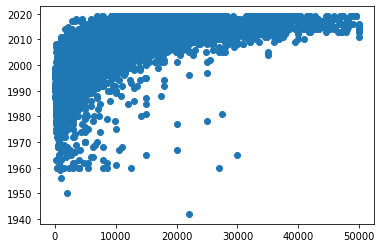

In [68]:
x=df["price_usd"]
y=df["year_produced"]
plt.scatter(x,y)
plt.show

The range of year_produced goes from 1050 - 2020
The range for proce_usd goes from 0-5000
We need to bring them in the same range by normalizing it

In [69]:
from sklearn.preprocessing import MinMaxScaler

In [70]:
scaler = MinMaxScaler()


In [71]:
df.head()

,transmission,odometer_value,year_produced,engine_has_gas,engine_type,engine_capacity,has_warranty,price_usd,is_exchangeable,number_of_photos,...,s_owned,d_all,d_front,d_rear,l_Брестская обл.,l_Витебская обл.,l_Гомельская обл.,l_Гродненская обл.,l_Минская обл.,l_Могилевская обл.
0,1,190000,2010,0,0,2.5,0,10900.00,0,9,...,1,1,0,0,0,0,0,0,1,0
1,1,290000,2002,0,0,3.0,0,5000.00,1,12,...,1,1,0,0,0,0,0,0,1,0
2,1,402000,2001,0,0,2.5,0,2800.00,1,4,...,1,1,0,0,0,0,0,0,1,0
3,0,10000,1999,0,0,3.0,0,9999.00,1,9,...,1,1,0,0,0,0,0,0,1,0
4,1,280000,2001,0,0,2.5,0,2134.11,1,14,...,1,1,0,0,0,0,1,0,0,0


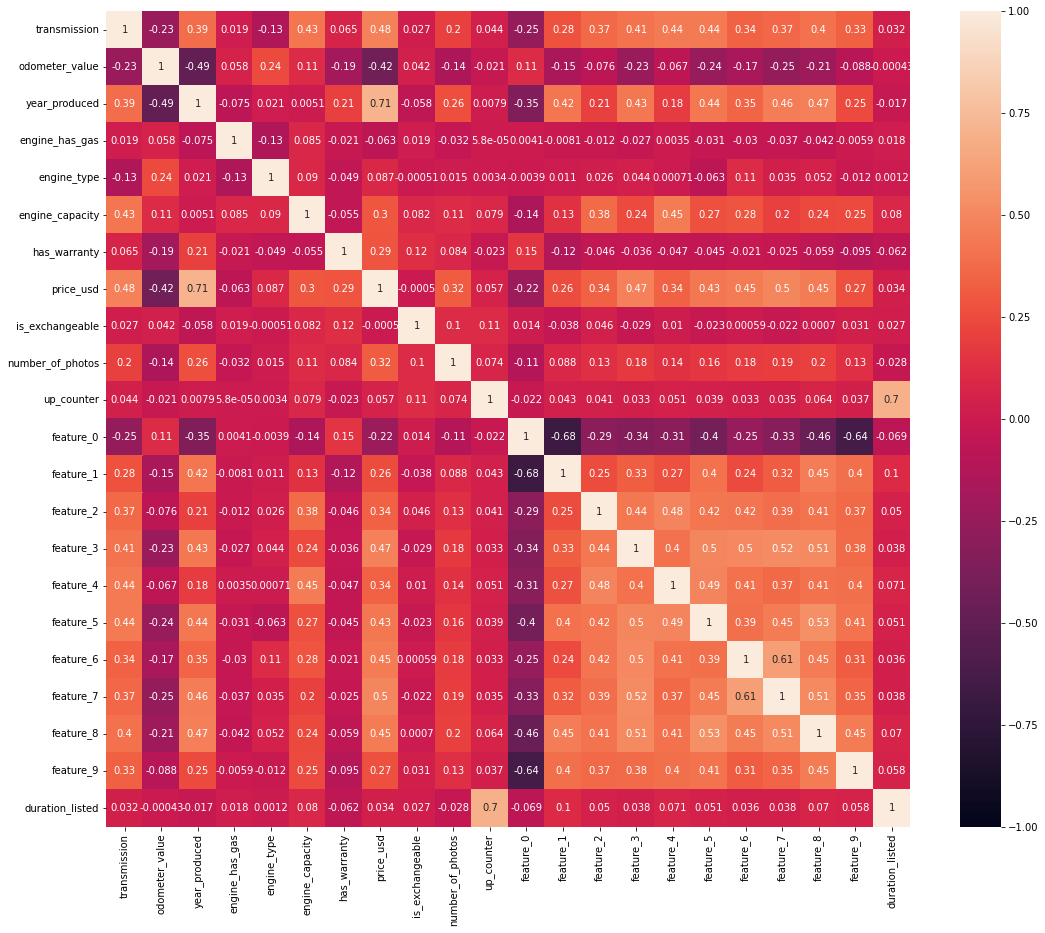

In [81]:
#Let's find correlations among columns
import seaborn as sns
corr = df.loc[:, 'transmission': 'duration_listed'].corr()
plt.figure(figsize=(18, 15))
sns.heatmap(corr, annot = True, vmin = -1.0, cmap = "rocket")
plt.show()

In [83]:
X=df.drop("engine_type",axis=1).values
y=df["engine_type"].values

In [84]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

In [85]:
sc = StandardScaler()
X = sc.fit_transform(X)

**Lets train it using neutal network**

In [87]:

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

inputs = tf.keras.Input(shape = (118, ))
x = tf.keras.layers.Dense(64, activation='relu')(inputs)
x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(3, activation = 'softmax')(x)

model = tf.keras.Model(inputs, outputs)

model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy', 
             metrics = ['accuracy'])

history = model.fit(X_train, y_train,
                       validation_split=0.2,
                    batch_size=32,
                    epochs=100,
                   callbacks=[
                       tf.keras.callbacks.EarlyStopping(
                       monitor = 'val_loss', 
                       patience = 3,
                       restore_best_weights = True)
                   ])

Epoch 1/100
771/771 [==============================] - 2s 2ms/step - loss: 0.0594 - accuracy: 0.9806 - val_loss: 0.0011 - val_accuracy: 0.9997
Epoch 2/100
771/771 [==============================] - 2s 3ms/step - loss: 8.7988e-04 - accuracy: 0.9998 - val_loss: 5.2691e-04 - val_accuracy: 0.9997
Epoch 3/100
771/771 [==============================] - 2s 3ms/step - loss: 6.6504e-05 - accuracy: 1.0000 - val_loss: 1.4924e-04 - val_accuracy: 1.0000
Epoch 4/100
771/771 [==============================] - 2s 2ms/step - loss: 2.5196e-05 - accuracy: 1.0000 - val_loss: 1.1679e-04 - val_accuracy: 1.0000
Epoch 5/100
771/771 [==============================] - 2s 2ms/step - loss: 1.5095e-05 - accuracy: 1.0000 - val_loss: 9.8809e-05 - val_accuracy: 1.0000
Epoch 6/100
771/771 [==============================] - 2s 2ms/step - loss: 9.3356e-06 - accuracy: 1.0000 - val_loss: 7.9631e-05 - val_accuracy: 1.0000
Epoch 7/100
771/771 [==============================] - 2s 2ms/step - loss: 5.8235e-06 - accuracy: 1.00

In [88]:
print("accuracy is ",model.evaluate(X_test, y_test)[1])

241/241 [==============================] - 0s 1ms/step - loss: 9.5689e-04 - accuracy: 0.9997
accuracy is  0.999740481376648
